使用pandas读取数据集github_bot_processed_data.csv。
使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。 使用describe()方法生成数据的描述性统计信息。

In [3]:
import pandas as pd

df = pd.read_csv('github_bot_processed_data.csv')

print(df.head())
df.info()
df.describe()


   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                                NaN            26   
1  I just press the buttons randomly, and the pro...            30   
2         Time is unimportant,\nonly life important.           103   
3                                                NaN            49   
4                                                NaN            11   

   public_gists  followers  following                 created_at  \
0             1          5          1  2011-09-26 17:27:03+00:00   
1             3          9          6  2015-06

,public_repos,public_gists,followers,following,text_bot_count
count,19768.000000,19768.000000,19768.000000,19768.000000,19768.000000
mean,84.139215,25.214083,245.497015,44.520741,0.061362
std,574.750217,635.690142,1535.939961,366.793439,0.341003
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,7.000000,0.000000,0.000000
50%,35.000000,2.000000,33.000000,4.000000,0.000000
75%,83.000000,10.000000,125.000000,22.000000,0.000000
max,50000.000000,55781.000000,95752.000000,27775.000000,5.000000


对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果
能格式化的只有日期数据，其他数据类型无法格式化

In [9]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['created_at'] = df['created_at'].dt.strftime('%Y-%m-%d %H:%M:%S')
print(df['created_at'])

df['updated_at'] = pd.to_datetime(df['updated_at'])
df['updated_at'] = df['updated_at'].dt.strftime('%Y-%m-%d %H:%M:%S')
print(df['updated_at'])

0        2011-09-26 17:27:03
1        2015-06-29 10:12:46
2        2008-08-29 16:20:03
3        2014-05-20 18:43:09
4        2012-08-16 14:19:13
                ...         
19763    2014-07-02 23:27:34
19764    2017-12-06 21:56:31
19765    2015-11-14 14:44:05
19766    2021-11-23 18:55:29
19767    2016-04-22 22:11:59
Name: created_at, Length: 19768, dtype: object
0        2023-10-13 11:21:10
1        2023-10-07 06:26:14
2        2023-10-02 02:11:21
3        2023-10-12 12:54:59
4        2023-10-06 11:58:41
                ...         
19763    2023-08-15 16:38:34
19764    2023-07-26 18:32:25
19765    2022-08-23 21:09:49
19766    2023-10-06 22:50:45
19767    2022-07-07 19:48:21
Name: updated_at, Length: 19768, dtype: object


对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响

In [28]:
import numpy as np
df['log_public_repos'] = np.log1p(df['public_repos'])
df['log_public_gists'] = np.log1p(df['public_gists'])
df['log_followers'] = np.log1p(df['followers'])
df['log_following'] = np.log1p(df['following'])
print(df['log_public_repos'].head())


0    1.457646
1    1.489299
2    1.730662
3    1.591686
4    1.248441
Name: log_public_repos, dtype: float64


绘制条形图：展示label列的类别分布

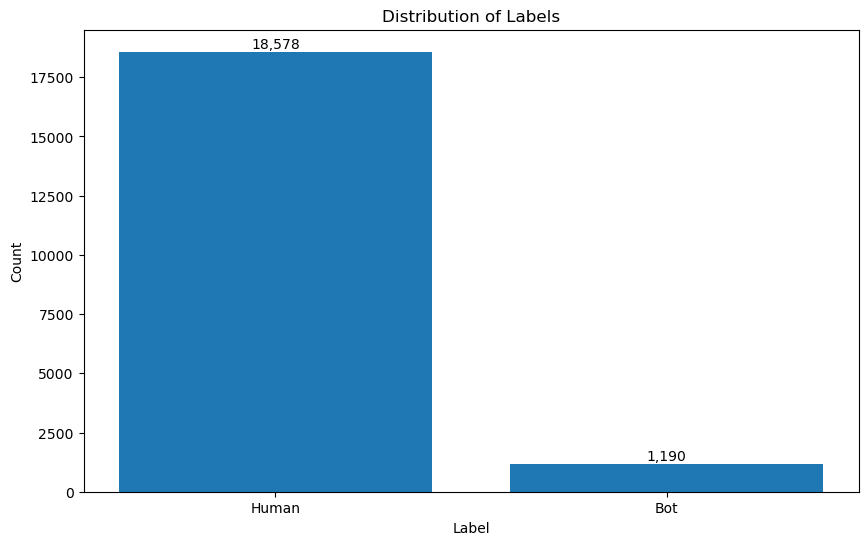

In [13]:
import matplotlib.pyplot as plt

# 获取标签值和计数
labels = df['label'].value_counts().index
counts = df['label'].value_counts().values

# 创建条形图
plt.figure(figsize=(10, 6))  # 设置图表大小
bars = plt.bar(labels, counts)

# 添加数值标签
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',  # 格式化数字显示
             ha='center', va='bottom')

# 添加标题和标签
plt.title('Distribution of Labels', fontsize=12)
plt.xlabel('Label')
plt.ylabel('Count')

# 显示图表
plt.show()


绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布

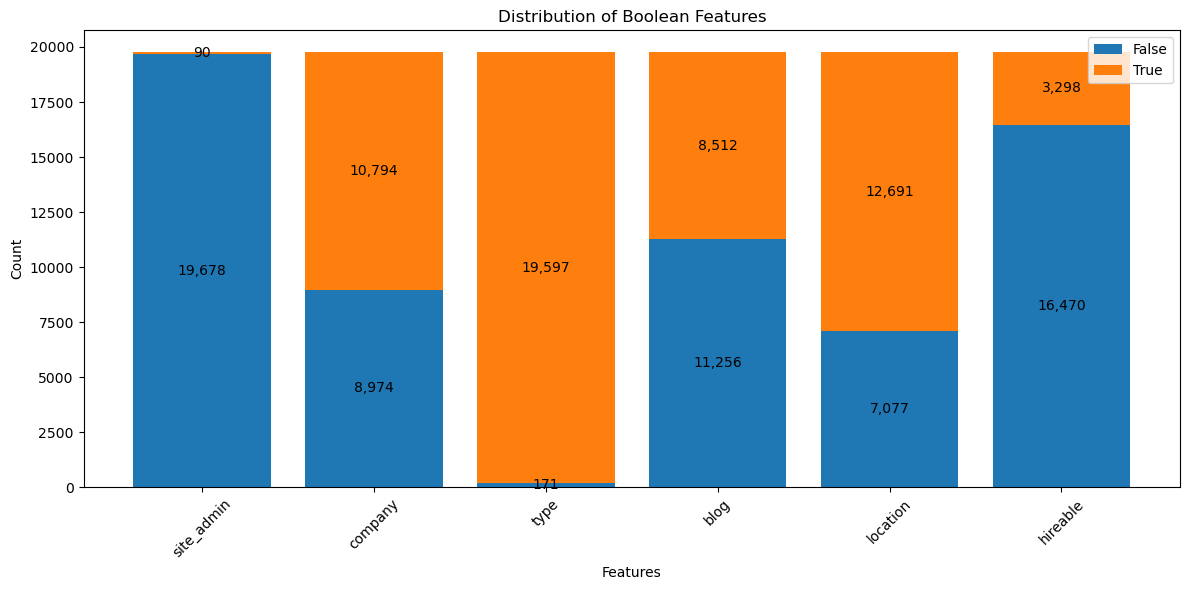

In [14]:
# 选择要展示的布尔特征
bool_features = ['site_admin', 'company', 'type', 'blog', 'location', 'hireable']

# 计算每个特征的True和False的数量
feature_counts = {}
for feature in bool_features:
    counts = df[feature].value_counts()
    feature_counts[feature] = [counts.get(True, 0), counts.get(False, 0)]

# 创建堆积柱状图
plt.figure(figsize=(12, 6))

# 绘制False的部分
false_values = [counts[1] for counts in feature_counts.values()]
bars_false = plt.bar(bool_features, false_values, label='False')

# 绘制True的部分
true_values = [counts[0] for counts in feature_counts.values()]
bars_true = plt.bar(bool_features, true_values, bottom=false_values, label='True')

# 添加数值标签
def add_labels(bars, values, bottom=None):
    for bar, value in zip(bars, values):
        height = bar.get_height()
        y_pos = height/2
        if bottom is not None:
            y_pos += bottom[bars.index(bar)]
        plt.text(bar.get_x() + bar.get_width()/2., y_pos,
                f'{int(value):,}',
                ha='center', va='center')

add_labels(bars_false, false_values)
add_labels(bars_true, true_values, false_values)

# 添加标题和标签
plt.title('Distribution of Boolean Features', fontsize=12)
plt.xlabel('Features')
plt.ylabel('Count')
plt.legend()

# 旋转x轴标签以防重叠
plt.xticks(rotation=45)

# 调整布局以防止标签被切掉
plt.tight_layout()

plt.show()

绘制直方图：展示log_public_repos的对数变换后的数据分布

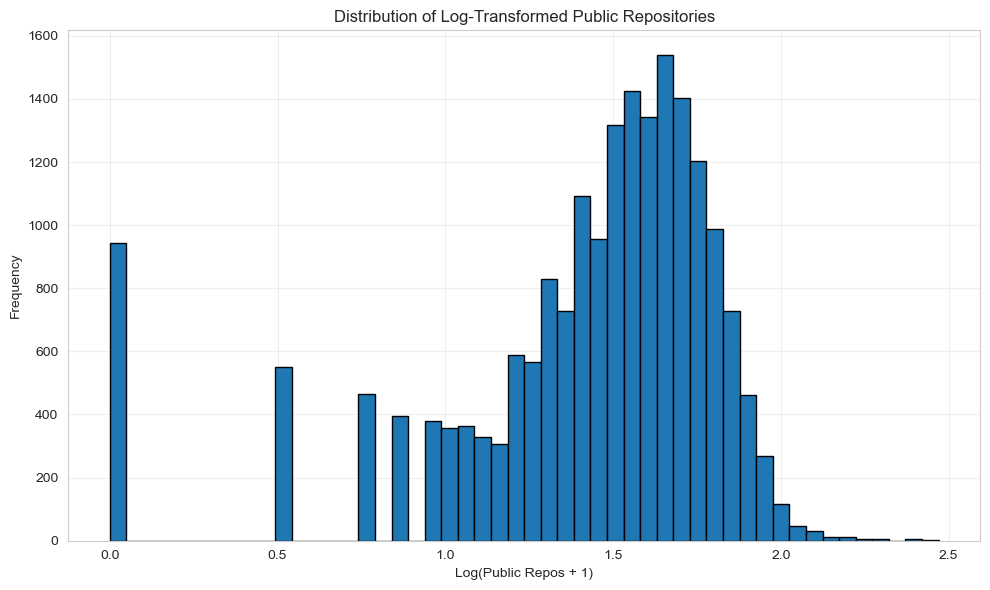

In [30]:
plt.figure(figsize=(10, 6))

# 创建直方图
plt.hist(df['log_public_repos'], bins=50, edgecolor='black')

# 添加标题和标签
plt.title('Distribution of Log-Transformed Public Repositories', fontsize=12)
plt.xlabel('Log(Public Repos + 1)')
plt.ylabel('Frequency')

# 添加网格线使图表更易读
plt.grid(True, alpha=0.3)

# 调整布局
plt.tight_layout()

plt.show()

绘制散点图：展示public_repos与followers之间的关系

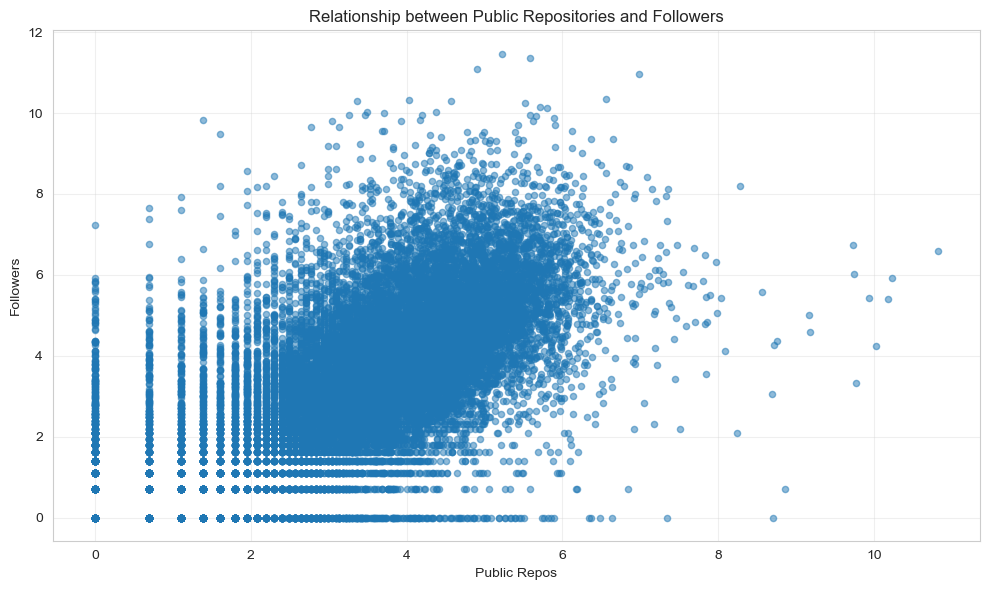

In [32]:
plt.figure(figsize=(10, 6))

# 创建散点图
plt.scatter(df['public_repos'], df['followers'], 
           alpha=0.5,  # 设置透明度
           s=20)       # 设置点的大小

# 添加标题和标签
plt.title('Relationship between Public Repositories and Followers', fontsize=12)
plt.xlabel('Public Repos')
plt.ylabel('Followers')

# 添加网格线
plt.grid(True, alpha=0.3)


# 调整布局
plt.tight_layout()

plt.show()

绘制散点矩阵：展示多个数值型特征之间的成对关系

<Figure size 1200x1200 with 0 Axes>

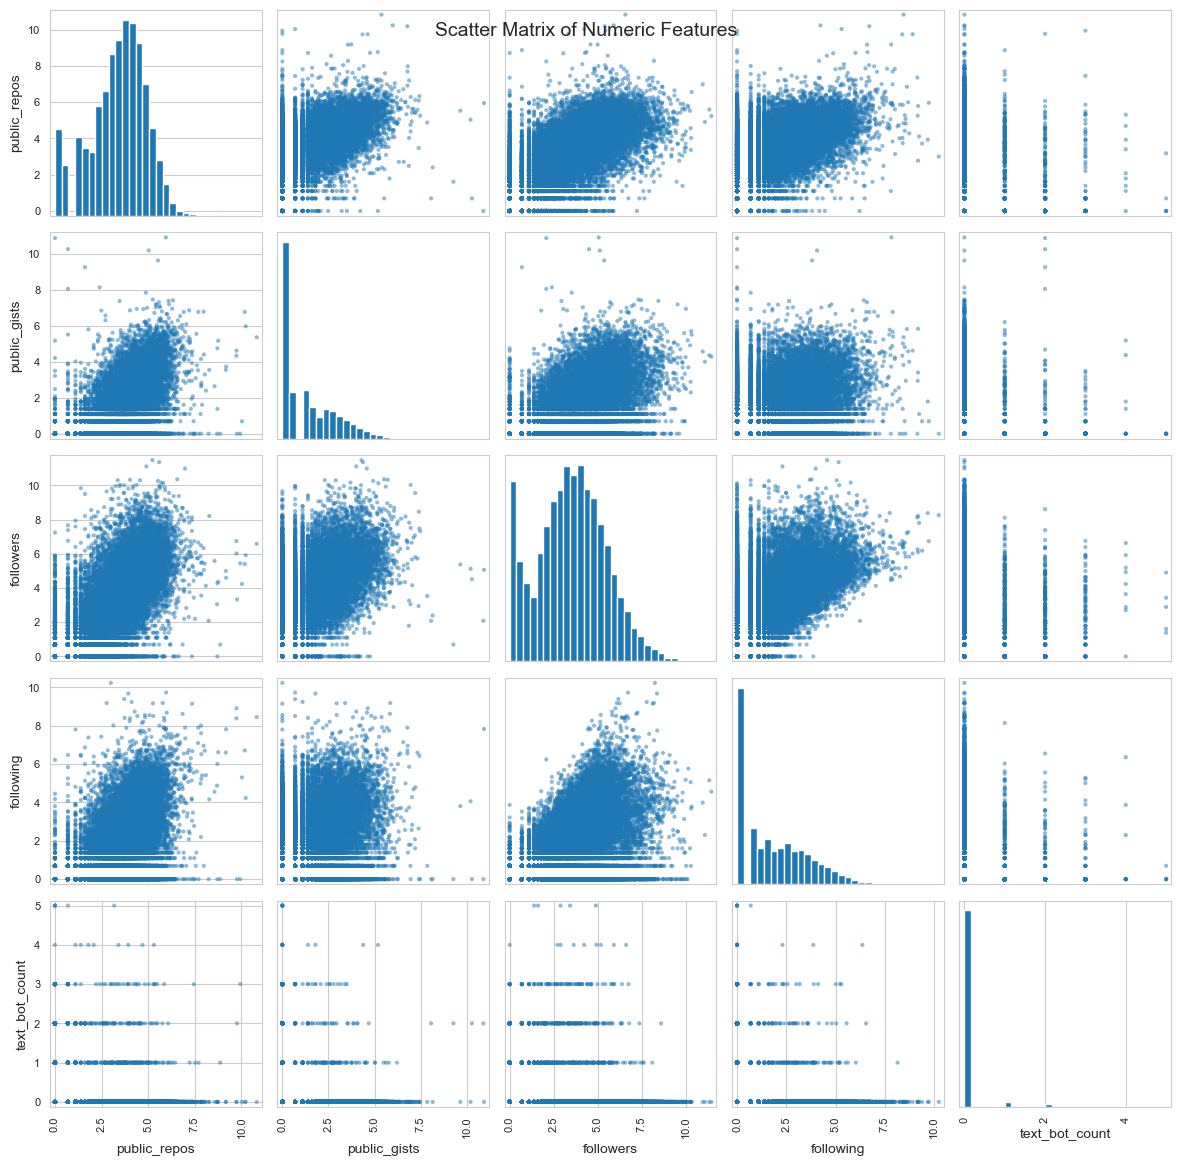


Correlation Matrix:
                public_repos  public_gists  followers  following  \
public_repos           1.000         0.591      0.638      0.527   
public_gists           0.591         1.000      0.572      0.419   
followers              0.638         0.572      1.000      0.527   
following              0.527         0.419      0.527      1.000   
text_bot_count        -0.242        -0.102     -0.128     -0.128   

                text_bot_count  
public_repos            -0.242  
public_gists            -0.102  
followers               -0.128  
following               -0.128  
text_bot_count           1.000  


In [33]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# 选择要展示的数值型特征
numeric_features = ['public_repos', 'public_gists', 'followers', 'following', 'text_bot_count']

# 创建散点矩阵
fig = plt.figure(figsize=(12, 12))
scatter_matrix(df[numeric_features], 
              figsize=(12, 12),      # 设置图表大小
              diagonal='hist',        # 对角线上显示直方图
              alpha=0.5,             # 设置点的透明度
              hist_kwds={'bins': 30}) # 设置直方图的箱数

# 添加总标题
plt.suptitle('Scatter Matrix of Numeric Features', fontsize=14, y=0.95)

# 调整子图之间的间距
plt.tight_layout()

plt.show()

# 计算并显示相关系数矩阵
correlation_matrix = df[numeric_features].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix.round(3))

绘制箱线图：展示不同label类别下log_followers的分布。

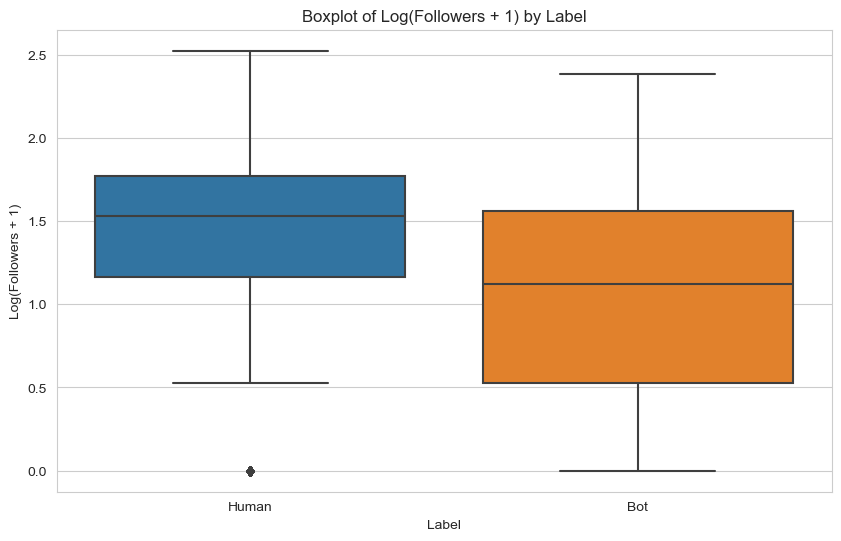

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# 创建箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='log_followers', data=df)

# 添加标题和标签
plt.title('Boxplot of Log(Followers + 1) by Label', fontsize=12)
plt.xlabel('Label')
plt.ylabel('Log(Followers + 1)')

# 显示图表
plt.show()

绘制成对图：展示不同特征之间的成对关系，并根据label分类

c:\Users\89172\anaconda3\envs\tmp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\89172\anaconda3\envs\tmp\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\89172\anaconda3\envs\tmp\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\89172\anaconda3\envs\tmp\Lib\site-packages\seaborn\_oldcore.py:1075: Fut

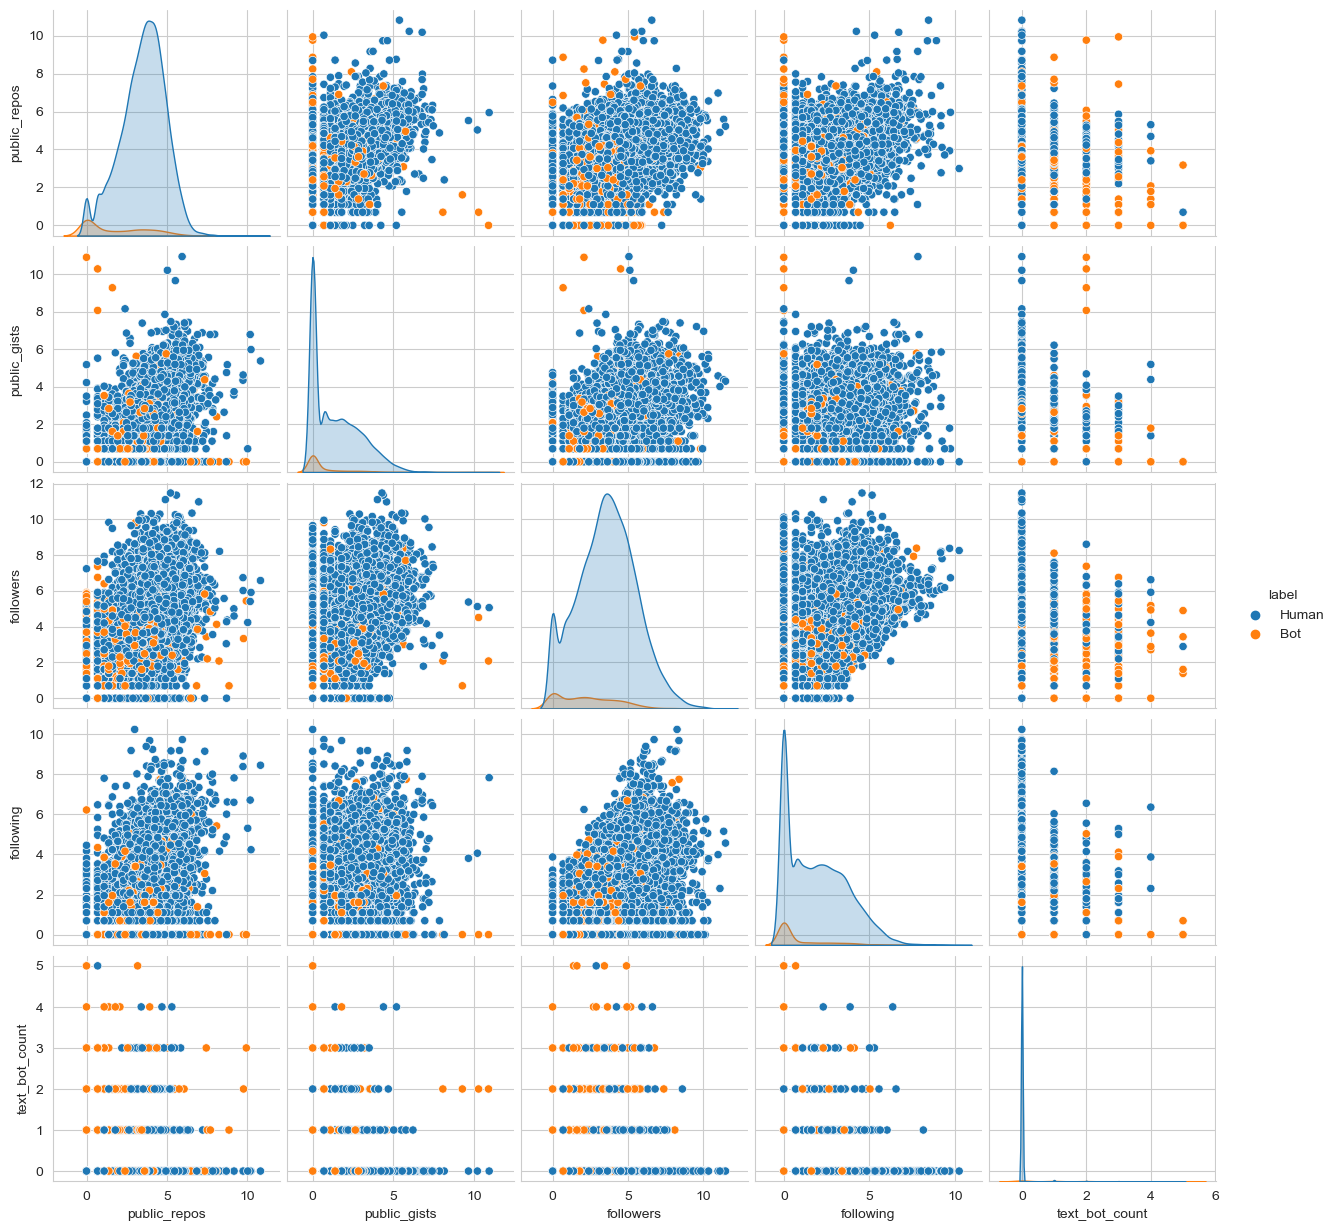

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# 创建成对图
sns.pairplot(df, vars=['public_repos', 'public_gists', 'followers', 'following', 'text_bot_count'], hue='label')

# 显示图表
plt.show()

绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性

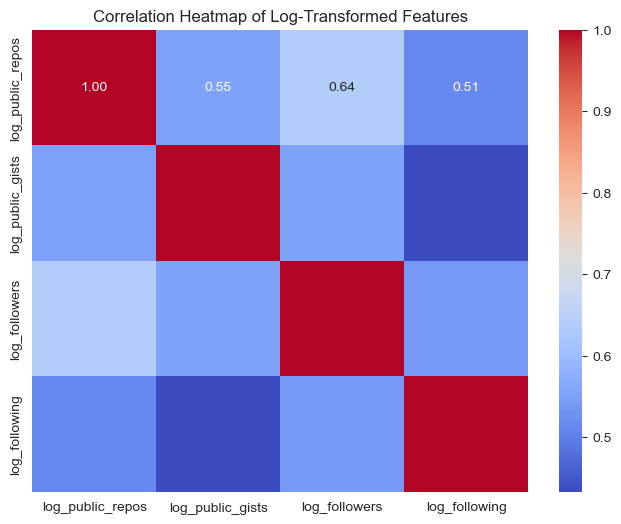

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 选择要计算相关性的特征
features = ['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']

# 计算相关系数矩阵
correlation_matrix = df[features].corr()

# 创建热图
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# 添加标题
plt.title('Correlation Heatmap of Log-Transformed Features', fontsize=12)

# 显示图表
plt.show()

绘制小提琴图：展示label与log_followers之间的分布差异

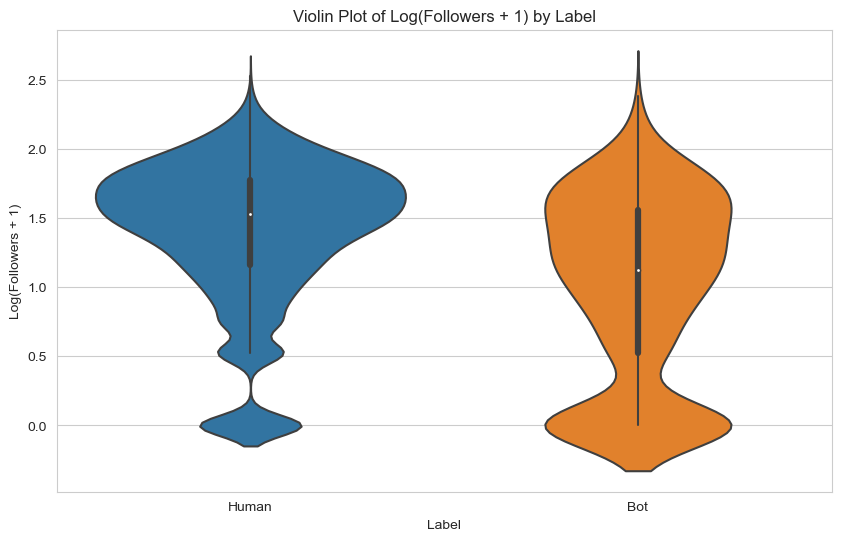

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 确保 'log_followers' 列存在
df['log_followers'] = np.log1p(df['followers'])

# 创建小提琴图
plt.figure(figsize=(10, 6))
sns.violinplot(x='label', y='log_followers', data=df)

# 添加标题和标签
plt.title('Violin Plot of Log(Followers + 1) by Label', fontsize=12)
plt.xlabel('Label')
plt.ylabel('Log(Followers + 1)')

# 显示图表
plt.show()

使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等

In [41]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profiling Report", explorative=True)

# 显示报告
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]